MULTIVARIATE LINEAR REGRESSION

In [25]:
import zipfile

def extract_data(file_path,file_name):
    with zipfile.ZipFile(file_path+file_name,'r') as file:
        file.extractall()

extract_data('./','water_quality.zip')        

In [310]:
import os
import pandas as pd
def load_dataset(file_path,file_name):
    csv_path=os.path.join(file_path,file_name)
    return pd.read_csv(csv_path)
data_2018=load_dataset('./','ground_water_quality_2018_post.csv')   
data_2019=load_dataset('./','ground_water_quality_2019_post.csv')   
data_2020=load_dataset('./','ground_water_quality_2020_post.csv')   


In [311]:
data_2018.shape[1]

26

In [312]:
data_2019.shape[1]

26

In [313]:
data_2020.shape[1]

27

In [314]:
data=pd.concat([data_2018,data_2020])

In [315]:
data.shape[1]

27

In [316]:
data.shape[0]

742

In [317]:
data.head()


sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...     Na    K    Ca      Mg         T.H  \
0  postmonsoon 2018   8.28   745  ...   49.0  4.0  48.0  38.896  279.934211   
1  postmonsoon 2018   8.29   921  ...   42.0  5.0  56.0  63.206  399.893092   
2  postmonsoon 2018   7.69   510  ...   45.0  2.0  24.0  38.896  219.934211   
3  postmonsoon 2018   8.09   422  ...   27.0  1.0  32.0  19.448  159.967105   
4  postmonsoon 2018   8.21  2321  ...  298.0  5.0  56.0  92.378  519.843750   

        SAR  Classification       RSC  Classification.1  Unnamed: 8  
0  1.273328            C2S1 -1.198684              P.S.         NaN  
1  0.913166            C3S1 -3.397862              P.S.         NaN  
2  1.319284            C2S1 -0.398684              P.S.         NaN  
3  0.928155            C2S1  0.000658              P.S.         NaN  
4  5.682664            C4S2 -4.396875              P.S.         NaN  

[5 rows x 27 columns]

In [318]:
data.tail()


sno district        mandal       village    lat_gis   long_gis   gwl  \
363  375  YADADRI  S.Narayanpur  S.Narayanpur  17.144719  78.860010  9.90   
364  376  YADADRI   Thurkapally    Gandamalla  17.733101  78.853831  5.74   
365  377  YADADRI     Valigonda    T. somaram  17.399953  78.952290  1.72   
366  378  YADADRI     Valigonda   Vemulakonda  17.347782  79.143433  1.65   
367  379  YADADRI       Y.Gutta    Mallapuram  17.633555  78.911638  4.92   

                season    pH   E.C  ...      Na      K     Ca       Mg  \
363  Post-monsoon 2020   7.8  2324  ...  169.30   2.60  160.0   97.240   
364  Post-monsoon 2020  8.26  2109  ...  211.30  43.30   48.0  116.688   
365  Post-monsoon 2020  8.77  1115  ...   60.44   3.04   80.0   53.482   
366  Post-monsoon 2020  7.76  5053  ...  465.20   3.30  400.0   92.378   
367  Post-monsoon 2020  8.13  2280  ...  170.70   5.60  152.0   97.240   

             T.H       SAR  Classification        RSC  Classification.1  \
363   799.835526  2.602728            C4S1  -8.596711              P.S.   
364   599.802632  3.751176            C3S1  -3.396053              P.S.   
365   419.909539  1.282386            C3S1  -4.398191              P.S.   
366  1379.843750  5.444988            C4S1 -21.996875              P.S.   
367   779.835526  2.657689            C4S1 -11.596711              P.S.   

     Unnamed: 8  
363         NaN  
364         NaN  
365         NaN  
366         NaN  
367         NaN  

[5 rows x 27 columns]

In [319]:
data.describe()


sno     lat_gis    long_gis         gwl          E.C  \
count  742.000000  742.000000  742.000000  736.000000   742.000000   
mean   189.033693   17.704869   78.793392    8.708003  1362.229111   
std    109.656402    0.852004    0.817355    7.735921   889.211708   
min      1.000000   15.896441   77.444000    0.170000   212.000000   
25%     94.000000   17.135000   78.189200    3.070000   777.500000   
50%    189.000000   17.632227   78.588964    5.875000  1173.500000   
75%    284.000000   18.358626   79.351937   12.435000  1660.250000   
max    379.000000   19.730555   80.920000   43.170000  9499.000000   

               TDS         CO3         HCO3           Cl           F  \
count   742.000000  742.000000   742.000000   742.000000  742.000000   
mean    871.826631    6.204898   294.152543   196.239892    1.128636   
std     569.095493   16.473540   131.888934   212.617545    0.819932   
min     135.680000    0.000000    30.000000    10.000000    0.043100   
25%     497.600000    0.000000   198.376340    60.000000    0.610000   
50%     751.040000    0.000000   283.013486   130.000000    0.930000   
75%    1062.560000    0.000000   370.000000   260.000000    1.397500   
max    6079.360000  100.000000  1070.000000  2480.000000    7.700000   

              NO3          SO4          Na           K          Ca  \
count   742.000000  742.000000  742.000000  742.000000  742.000000   
mean     77.116040   36.262062  123.376988    7.593827   81.511051   
std     103.252022   52.801238  112.269300   21.322547   66.356450   
min       0.097438    1.000000    5.076154    0.100000    1.200000   
25%      17.804580   13.312500   55.000000    2.000000   40.000000   
50%      43.786705   21.000000   91.965125    3.005000   64.000000   
75%      95.456023   37.000000  153.850000    5.982500  104.000000   
max    1028.000000  860.000000  748.100000  354.600000  640.000000   

               Mg          T.H         SAR         RSC  Unnamed: 8  
count  742.000000   742.000000  742.000000  742.000000         0.0  
mean    51.012615   413.373792    2.807213   -2.258903         NaN  
std     40.931232   277.285279    2.994578    5.270587         NaN  
min      4.862000    39.991776    0.194454  -59.584539         NaN  
25%     24.310000   239.944490    1.343300   -3.730051         NaN  
50%     43.758000   359.897204    2.052540   -1.197697         NaN  
75%     63.206000   519.831414    3.256481    0.000987         NaN  
max    457.028000  3479.226974   31.435063   18.200822         NaN

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 367
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               742 non-null    int64  
 1   district          742 non-null    object 
 2   mandal            742 non-null    object 
 3   village           742 non-null    object 
 4   lat_gis           742 non-null    float64
 5   long_gis          742 non-null    float64
 6   gwl               736 non-null    float64
 7   season            742 non-null    object 
 8   pH                742 non-null    object 
 9   E.C               742 non-null    int64  
 10  TDS               742 non-null    float64
 11  CO3               742 non-null    float64
 12  HCO3              742 non-null    float64
 13  Cl                742 non-null    int64  
 14  F                 742 non-null    float64
 15  NO3               742 non-null    float64
 16  SO4               742 non-null    float64
 17  Na

In [321]:
data=data.select_dtypes(exclude=['object'])

array([[<Axes: title={'center': 'sno'}>,
        <Axes: title={'center': 'lat_gis'}>,
        <Axes: title={'center': 'long_gis'}>,
        <Axes: title={'center': 'gwl'}>],
       [<Axes: title={'center': 'E.C'}>, <Axes: title={'center': 'TDS'}>,
        <Axes: title={'center': 'CO3'}>,
        <Axes: title={'center': 'HCO3'}>],
       [<Axes: title={'center': 'Cl'}>, <Axes: title={'center': 'F'}>,
        <Axes: title={'center': 'NO3 '}>,
        <Axes: title={'center': 'SO4'}>],
       [<Axes: title={'center': 'Na'}>, <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'T.H'}>, <Axes: title={'center': 'SAR'}>,
        <Axes: title={'center': 'RSC'}>, <Axes: >]], dtype=object)

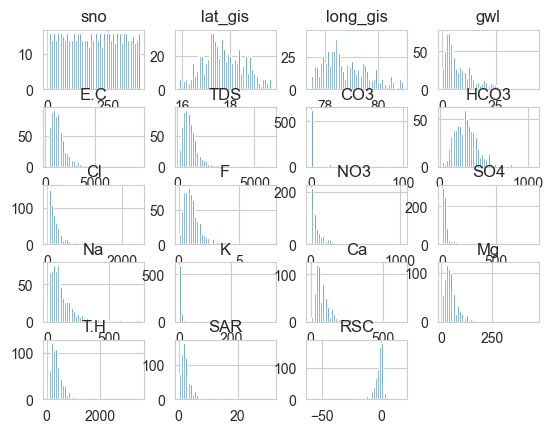

In [354]:
data.hist(bins=50)

In [322]:
data.columns.tolist()

['sno',
 'lat_gis',
 'long_gis',
 'gwl',
 'E.C',
 'TDS',
 'CO3',
 'HCO3',
 'Cl',
 'F',
 'NO3 ',
 'SO4',
 'Na',
 'K',
 'Ca',
 'Mg',
 'T.H',
 'SAR',
 'RSC',
 'Unnamed: 8']

In [323]:
data=data.drop(columns='Unnamed: 8')

In [324]:
correlation=data.corr()
correlation["RSC"].sort_values(ascending=False)

RSC         1.000000
SAR         0.303125
F           0.298212
CO3         0.251363
lat_gis     0.118040
HCO3        0.112582
long_gis    0.098396
gwl        -0.013362
sno        -0.089641
K          -0.100717
Na         -0.106094
SO4        -0.262486
NO3        -0.492413
TDS        -0.615658
E.C        -0.615658
Mg         -0.698593
Cl         -0.740453
Ca         -0.764716
T.H        -0.881868
Name: RSC, dtype: float64

<Axes: >

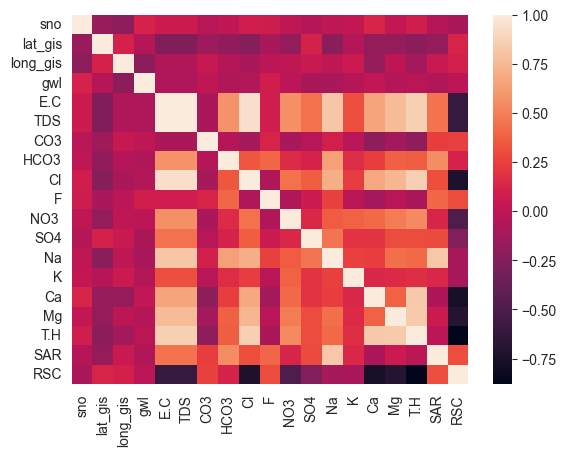

In [356]:
import seaborn as sns
sns.heatmap(correlation,cmap=None, annot=None)

In [325]:
data.isnull().sum()

sno         0
lat_gis     0
long_gis    0
gwl         6
E.C         0
TDS         0
CO3         0
HCO3        0
Cl          0
F           0
NO3         0
SO4         0
Na          0
K           0
Ca          0
Mg          0
T.H         0
SAR         0
RSC         0
dtype: int64

In [326]:
from sklearn.model_selection import train_test_split as spliter
X=data[['SAR','F','CO3','HCO3']]
y=data[['RSC']]

train_x,test_x,train_y,test_y=spliter(X,y,test_size=0.2,random_state=42)


In [327]:
train_x.isnull().sum()

SAR     0
F       0
CO3     0
HCO3    0
dtype: int64

In [328]:
test_x.isnull().sum()

SAR     0
F       0
CO3     0
HCO3    0
dtype: int64

In [329]:
#train_x=train_x.fillna(0)
#test_x=test_x.fillna(0)

In [330]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [331]:
#test_x=test_x.fillna(0)
y_pred=model.predict(test_x)
from sklearn.metrics import r2_score
r2=r2_score(test_y,y_pred)

In [332]:
y_pred

array([[ 1.00696926e+00],
       [ 9.43140131e+00],
       [-8.02460402e-01],
       [ 4.09255413e-01],
       [-1.40626295e+00],
       [-1.73143912e+00],
       [ 5.91637320e-01],
       [ 8.59551297e-01],
       [ 1.91898894e+01],
       [-2.25490336e+00],
       [-2.45042720e+00],
       [ 8.04467940e-01],
       [-3.11813313e+00],
       [-2.31706807e+00],
       [-2.35863726e+00],
       [-3.22516471e+00],
       [-3.83549587e+00],
       [-1.10690129e+00],
       [-3.11627175e+00],
       [-2.73208741e+00],
       [-4.33919780e+00],
       [-3.83704373e+00],
       [-2.86328096e+00],
       [-2.58754845e+00],
       [-3.82499906e+00],
       [-3.85616052e+00],
       [-1.96547003e+00],
       [-1.62873315e+00],
       [-4.42893811e+00],
       [-4.10655382e+00],
       [-1.18646987e+00],
       [-3.35972608e+00],
       [-1.46209762e+00],
       [-1.18946530e-01],
       [-2.45183709e-01],
       [-3.98383086e-01],
       [-3.60902178e+00],
       [-4.51241210e+00],
       [-2.1

In [333]:
r2

0.21841220021051355

In [ ]:
SINGLE LINEAR REGRESSION

In [335]:
import os
import pandas as pd
def load_dataset(file_path,file_name):
    csv_path=os.path.join(file_path,file_name)
    return pd.read_csv(csv_path)
single_data_2018=load_dataset('./','ground_water_quality_2018_post.csv')   
single_data_2019=load_dataset('./','ground_water_quality_2019_post.csv')   
single_data_2020=load_dataset('./','ground_water_quality_2020_post.csv')   


In [336]:
single_data_2018.shape[1],single_data_2019.shape[1],single_data_2020.shape[1]

(26, 26, 27)

In [337]:
data=pd.concat([single_data_2018,single_data_2020])

In [338]:
data.head()

sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...     Na    K    Ca      Mg         T.H  \
0  postmonsoon 2018   8.28   745  ...   49.0  4.0  48.0  38.896  279.934211   
1  postmonsoon 2018   8.29   921  ...   42.0  5.0  56.0  63.206  399.893092   
2  postmonsoon 2018   7.69   510  ...   45.0  2.0  24.0  38.896  219.934211   
3  postmonsoon 2018   8.09   422  ...   27.0  1.0  32.0  19.448  159.967105   
4  postmonsoon 2018   8.21  2321  ...  298.0  5.0  56.0  92.378  519.843750   

        SAR  Classification       RSC  Classification.1  Unnamed: 8  
0  1.273328            C2S1 -1.198684              P.S.         NaN  
1  0.913166            C3S1 -3.397862              P.S.         NaN  
2  1.319284            C2S1 -0.398684              P.S.         NaN  
3  0.928155            C2S1  0.000658              P.S.         NaN  
4  5.682664            C4S2 -4.396875              P.S.         NaN  

[5 rows x 27 columns]

In [339]:
data.tail()

sno district        mandal       village    lat_gis   long_gis   gwl  \
363  375  YADADRI  S.Narayanpur  S.Narayanpur  17.144719  78.860010  9.90   
364  376  YADADRI   Thurkapally    Gandamalla  17.733101  78.853831  5.74   
365  377  YADADRI     Valigonda    T. somaram  17.399953  78.952290  1.72   
366  378  YADADRI     Valigonda   Vemulakonda  17.347782  79.143433  1.65   
367  379  YADADRI       Y.Gutta    Mallapuram  17.633555  78.911638  4.92   

                season    pH   E.C  ...      Na      K     Ca       Mg  \
363  Post-monsoon 2020   7.8  2324  ...  169.30   2.60  160.0   97.240   
364  Post-monsoon 2020  8.26  2109  ...  211.30  43.30   48.0  116.688   
365  Post-monsoon 2020  8.77  1115  ...   60.44   3.04   80.0   53.482   
366  Post-monsoon 2020  7.76  5053  ...  465.20   3.30  400.0   92.378   
367  Post-monsoon 2020  8.13  2280  ...  170.70   5.60  152.0   97.240   

             T.H       SAR  Classification        RSC  Classification.1  \
363   799.835526  2.602728            C4S1  -8.596711              P.S.   
364   599.802632  3.751176            C3S1  -3.396053              P.S.   
365   419.909539  1.282386            C3S1  -4.398191              P.S.   
366  1379.843750  5.444988            C4S1 -21.996875              P.S.   
367   779.835526  2.657689            C4S1 -11.596711              P.S.   

     Unnamed: 8  
363         NaN  
364         NaN  
365         NaN  
366         NaN  
367         NaN  

[5 rows x 27 columns]

In [340]:
data.describe()

sno     lat_gis    long_gis         gwl          E.C  \
count  742.000000  742.000000  742.000000  736.000000   742.000000   
mean   189.033693   17.704869   78.793392    8.708003  1362.229111   
std    109.656402    0.852004    0.817355    7.735921   889.211708   
min      1.000000   15.896441   77.444000    0.170000   212.000000   
25%     94.000000   17.135000   78.189200    3.070000   777.500000   
50%    189.000000   17.632227   78.588964    5.875000  1173.500000   
75%    284.000000   18.358626   79.351937   12.435000  1660.250000   
max    379.000000   19.730555   80.920000   43.170000  9499.000000   

               TDS         CO3         HCO3           Cl           F  \
count   742.000000  742.000000   742.000000   742.000000  742.000000   
mean    871.826631    6.204898   294.152543   196.239892    1.128636   
std     569.095493   16.473540   131.888934   212.617545    0.819932   
min     135.680000    0.000000    30.000000    10.000000    0.043100   
25%     497.600000    0.000000   198.376340    60.000000    0.610000   
50%     751.040000    0.000000   283.013486   130.000000    0.930000   
75%    1062.560000    0.000000   370.000000   260.000000    1.397500   
max    6079.360000  100.000000  1070.000000  2480.000000    7.700000   

              NO3          SO4          Na           K          Ca  \
count   742.000000  742.000000  742.000000  742.000000  742.000000   
mean     77.116040   36.262062  123.376988    7.593827   81.511051   
std     103.252022   52.801238  112.269300   21.322547   66.356450   
min       0.097438    1.000000    5.076154    0.100000    1.200000   
25%      17.804580   13.312500   55.000000    2.000000   40.000000   
50%      43.786705   21.000000   91.965125    3.005000   64.000000   
75%      95.456023   37.000000  153.850000    5.982500  104.000000   
max    1028.000000  860.000000  748.100000  354.600000  640.000000   

               Mg          T.H         SAR         RSC  Unnamed: 8  
count  742.000000   742.000000  742.000000  742.000000         0.0  
mean    51.012615   413.373792    2.807213   -2.258903         NaN  
std     40.931232   277.285279    2.994578    5.270587         NaN  
min      4.862000    39.991776    0.194454  -59.584539         NaN  
25%     24.310000   239.944490    1.343300   -3.730051         NaN  
50%     43.758000   359.897204    2.052540   -1.197697         NaN  
75%     63.206000   519.831414    3.256481    0.000987         NaN  
max    457.028000  3479.226974   31.435063   18.200822         NaN

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 367
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               742 non-null    int64  
 1   district          742 non-null    object 
 2   mandal            742 non-null    object 
 3   village           742 non-null    object 
 4   lat_gis           742 non-null    float64
 5   long_gis          742 non-null    float64
 6   gwl               736 non-null    float64
 7   season            742 non-null    object 
 8   pH                742 non-null    object 
 9   E.C               742 non-null    int64  
 10  TDS               742 non-null    float64
 11  CO3               742 non-null    float64
 12  HCO3              742 non-null    float64
 13  Cl                742 non-null    int64  
 14  F                 742 non-null    float64
 15  NO3               742 non-null    float64
 16  SO4               742 non-null    float64
 17  Na

In [342]:
data.shape[0]

742

In [343]:
data=data.drop(columns='Unnamed: 8')

In [344]:
data=data.select_dtypes(exclude=['object'])

In [345]:
data.columns.tolist()

['sno',
 'lat_gis',
 'long_gis',
 'gwl',
 'E.C',
 'TDS',
 'CO3',
 'HCO3',
 'Cl',
 'F',
 'NO3 ',
 'SO4',
 'Na',
 'K',
 'Ca',
 'Mg',
 'T.H',
 'SAR',
 'RSC']

In [346]:
correlation=data.corr()
correlation["RSC"].sort_values(ascending=False)

RSC         1.000000
SAR         0.303125
F           0.298212
CO3         0.251363
lat_gis     0.118040
HCO3        0.112582
long_gis    0.098396
gwl        -0.013362
sno        -0.089641
K          -0.100717
Na         -0.106094
SO4        -0.262486
NO3        -0.492413
TDS        -0.615658
E.C        -0.615658
Mg         -0.698593
Cl         -0.740453
Ca         -0.764716
T.H        -0.881868
Name: RSC, dtype: float64

<Axes: >

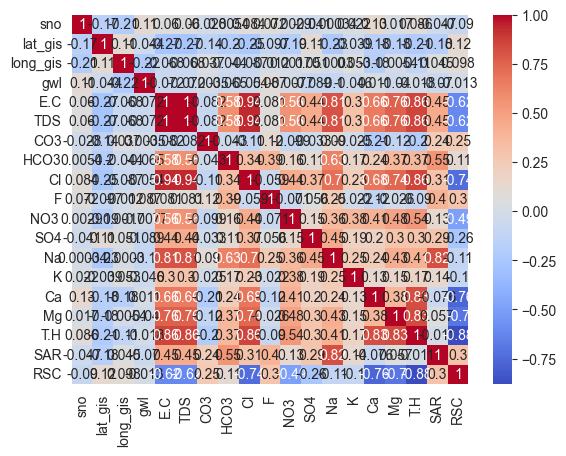

In [357]:
import seaborn as sns
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [347]:
data.isnull().sum()

sno         0
lat_gis     0
long_gis    0
gwl         6
E.C         0
TDS         0
CO3         0
HCO3        0
Cl          0
F           0
NO3         0
SO4         0
Na          0
K           0
Ca          0
Mg          0
T.H         0
SAR         0
RSC         0
dtype: int64

In [348]:
data=data.fillna(0)

In [349]:
from sklearn.model_selection import train_test_split as spliter
X=data[['SAR']]
y=data[['RSC']]

train_x,test_x,train_y,test_y=spliter(X,y,test_size=0.2,random_state=42)


In [350]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [351]:
model.coef_
#model.intercept_

array([[0.51220908]])

In [352]:
#test_x=test_x.fillna(0)
y_pred=model.predict(test_x)
from sklearn.metrics import r2_score
r2=r2_score(test_y,y_pred)

Text(0, 0.5, 'SAR')

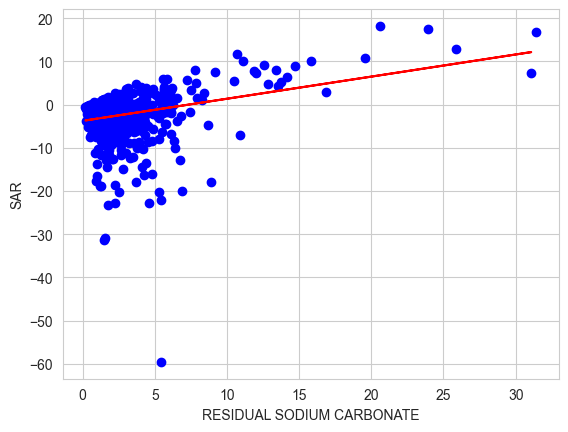

In [353]:
import matplotlib.pyplot as plt
plt.scatter(data.SAR,data.RSC,color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("RESIDUAL SODIUM CARBONATE")
plt.ylabel("SAR")